In [20]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [21]:
# Load the dataset
# data = fetch_california_housing()
# data = fetch_california_housing(download_if_missing=False) # Use the download_if_missing=False parameter to avoid re-downloading:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
# Explore the Dataset
# Check for missing values and general statistics:
df.info()
# print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int6

In [23]:
# Handle Missing Values
# df = df.dropna()  # Drop rows with missing values

# Dtype is float64, so we handle using median
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [25]:
# DecisionTreeRegressor expects numeric input, but it encountered a string (e.g., 'NEAR OCEAN') in your feature set (X_train)
print(df.select_dtypes(include=['object']).columns)


Index(['ocean_proximity'], dtype='object')


In [26]:
df = pd.get_dummies(df, drop_first=True)

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [28]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [29]:
 # Define Features (X) and Target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Train a Decision Tree Regressor
reg = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)

In [32]:
# Fit data
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [33]:
# Make predictions
y_pred = reg.predict(X_test)

In [34]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5113808887.9937935
R-squared: 0.6097547427629351


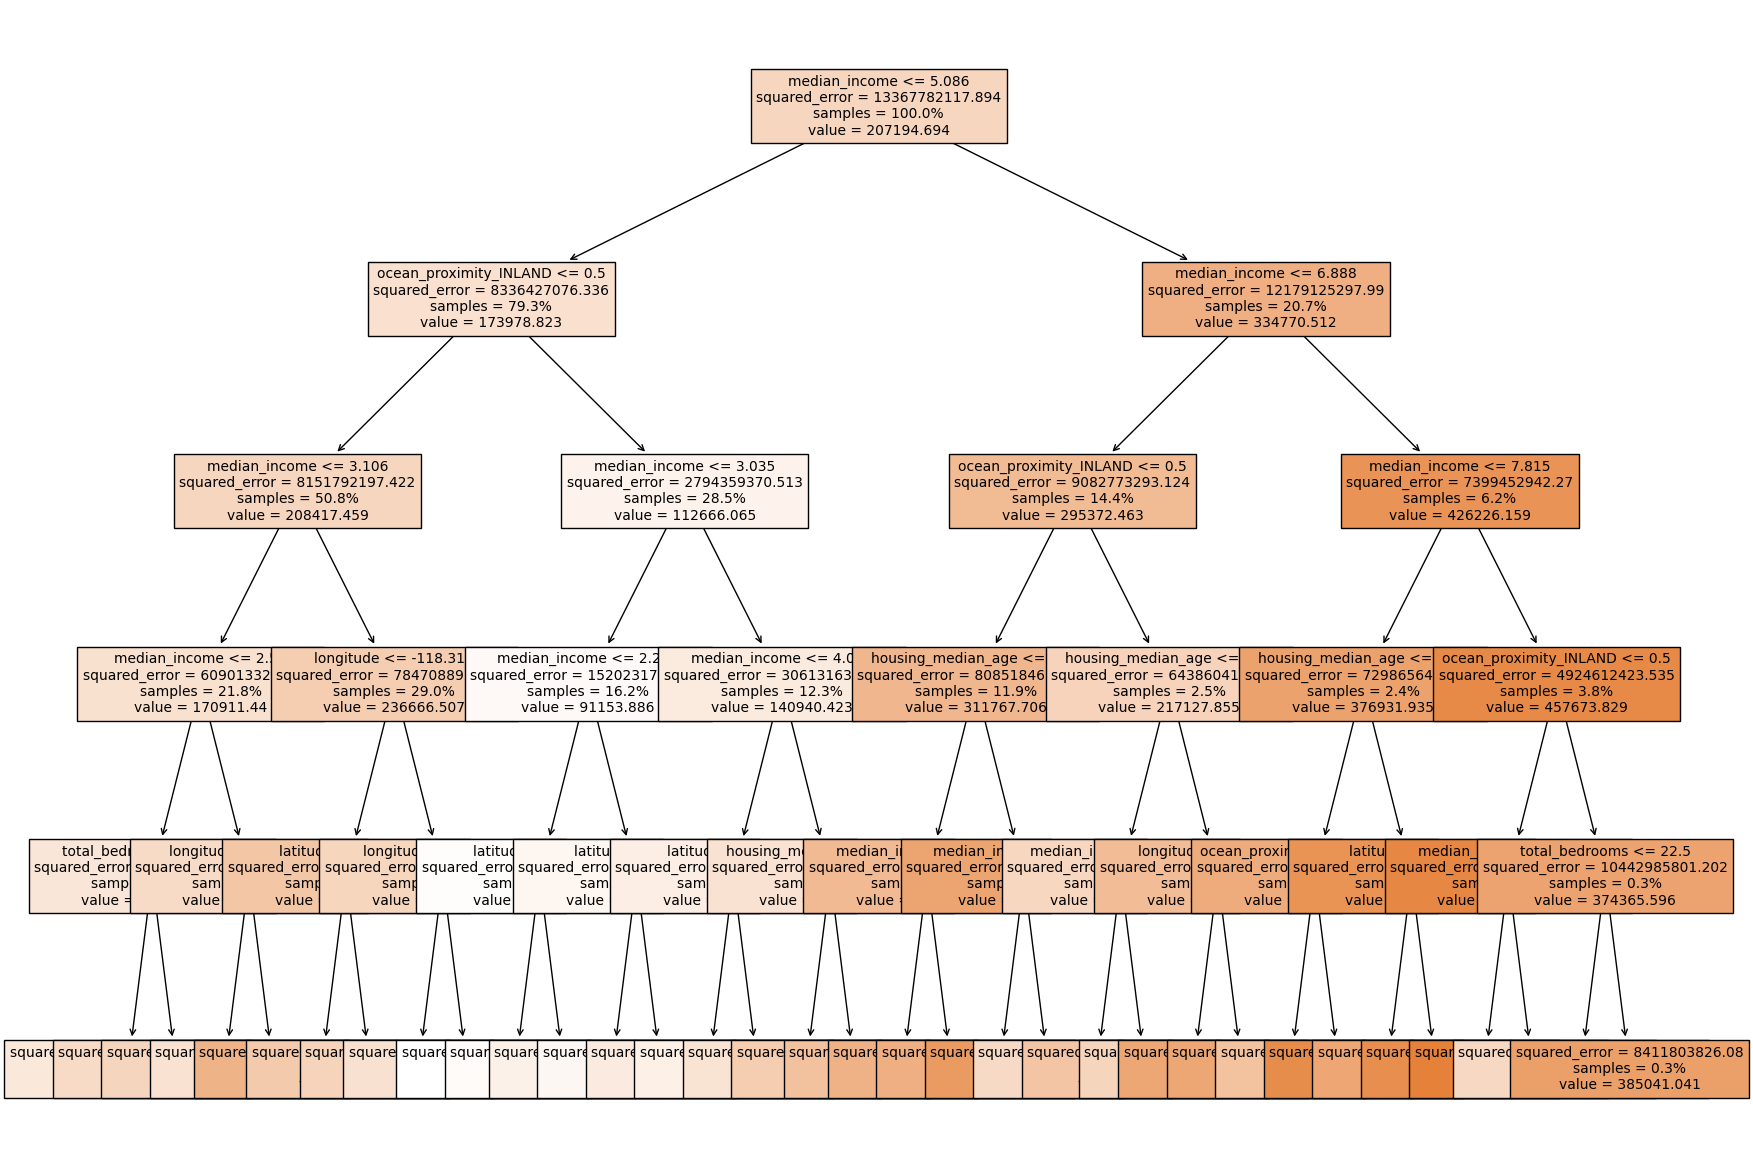

In [38]:
# Visualize the Decision Tree
# Increase figure size and adjust font size for readability
plt.figure(figsize=(20, 15))  # Increase the size further if needed
plot_tree(
    reg, 
    feature_names=X.columns, 
    filled=True, 
    fontsize=10,  # Adjust font size
    proportion=True  # Show proportions for each leaf node
)
plt.show()
